# Perceptron

Answer all marked questions (❓).  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Question 1

Consider the following linearly separable training set:

$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = -1$, $y^{(2)} = +1$, $y^{(3)} = +1$, $y^{(4)} = -1$


In [2]:
# Define points
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(np.shape(inputs))

(4, 3)


❓ Let us use the perceptron algorithm to separate the two classes of points.

1. Initialize all weights to zero (including the bias) 
2. Assume $sign(z) = +1$ iff $z ≥ 0$, and $−1$ if $z < 0$ 
3. Complete provided fucntion `perceptron_epoch` which performs one epoch of the perceptron algorithm
4. Use a learning rate of one
5. Apply algorithm until convergence 

Note: You can use provided function `plot_separation_line` to see the points and the separating hyperplane in each epoch

In [3]:
def perceptron_epoch(inputs, labels, w, eta):
    """
    Function to execute perceptron epoch. 
    
    Receives inputs, labels, previous weights (w) and learning rate(eta)
    
    Should output number of mistakes and new weights
    """
    mistakes = 0

    for x, y in zip(inputs, labels):
        y_hat = np.sign(np.dot(w, x))
        if y_hat != y:
            mistakes += 1
            w += eta * y * x

    print("Mistakes: %d" % mistakes)
    print("Weights: %s" % w)
    return mistakes, w

In [4]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1] * x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

Mistakes: 3
Weights: [-1.    0.    1.25]


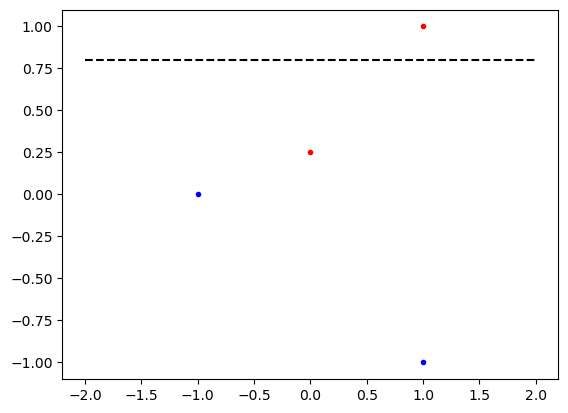

Mistakes: 1
Weights: [0.  0.  1.5]


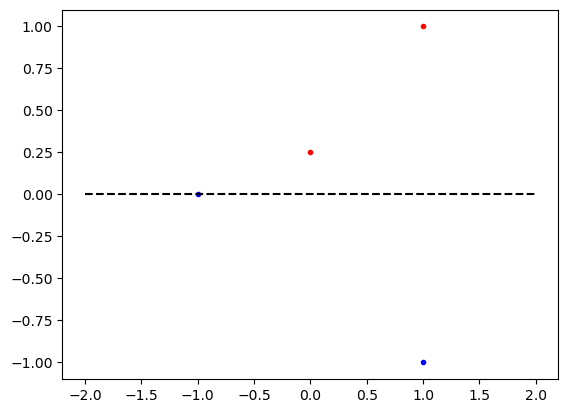

Mistakes: 2
Weights: [0.   1.   1.75]


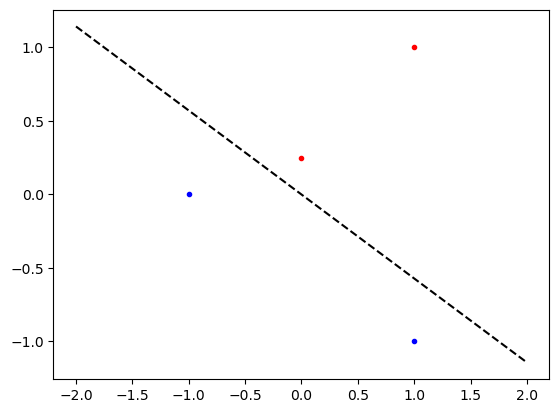

Mistakes: 0
Weights: [0.   1.   1.75]


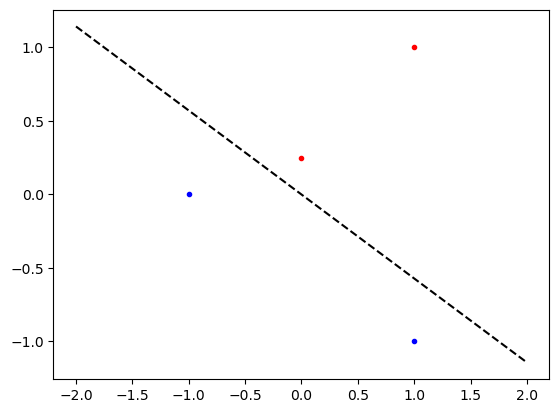

In [5]:
# Initialize weights and apply algorithm until convergence
w = np.zeros(num_features + 1)  # weights
eta = 1  # learning rate
converged = False

while not converged:
    mistakes, w = perceptron_epoch(inputs, labels, w, eta)
    plot_separation_line(inputs, labels, w)
    if mistakes == 0:
        converged = True

❓ What is the perceptron output for query point $\begin{bmatrix} 0 && 1   \end{bmatrix}^T$?

In [6]:
y = np.sign(np.dot(w, np.array([1, 0, 1])))
print(y)

1.0


❓ Change the initialization of weights and biases to be random with a standard normal distribution $\mathcal{N}(0,1)$. Try multiple times. Does it always converge?

*Hint:* `np.random.randn`

Mistakes: 3
Weights: [0.26561499 0.38984483 0.72908238]


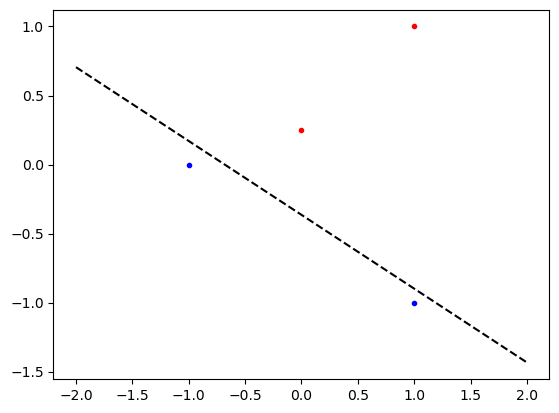

Mistakes: 0
Weights: [0.26561499 0.38984483 0.72908238]


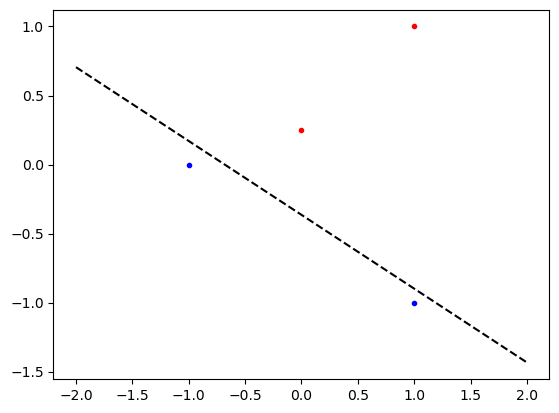

In [7]:
weights = np.random.randn(3)
eta = 1
converged = False

while not converged:
    mistakes, weights = perceptron_epoch(inputs, labels, weights, eta)
    plot_separation_line(inputs, labels, weights)
    if mistakes == 0:
        converged = True

## Question 2 

Let us generate a balanced dataset with 30 examples in $\mathbb{R}^2$ and 3 classes. 
Assume each of the 10 inputs associated to class $k \in \{0,1,2\}$ is generated as $x \sim \mathcal{N}(\mu_k, \sigma_k^2 I)$, with $\sigma_0=\sigma_1=\sigma_2 = 1$, 
$\mu_0 = [0, 0]^\top$, $\mu_1 = [0, 3]^\top$, and $\mu_2 = [2, 2]^\top$.

❓ Plot the data

In [3]:
#np.random.seed(42)

inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)

inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)

num_examples, num_features = np.shape(inputs)
num_classes = 3

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((30, 1)), inputs], axis=1)
#print(inputs)

labels = np.array([0] * 10 + [1] * 10 + [2] * 10)
print(np.shape(inputs))
print(np.shape(labels))

# Shuffling observations
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

[[ 1.         -0.67892841  1.86415044]
 [ 1.         -0.60444242  0.28506641]
 [ 1.         -1.2468775  -0.06206337]
 [ 1.          0.13487092  0.68513562]
 [ 1.          0.18769439 -0.3557502 ]
 [ 1.          0.29992119 -0.68945836]
 [ 1.          0.64933949 -0.44790629]
 [ 1.         -0.3055774   0.14010649]
 [ 1.         -0.43632381 -0.88206487]
 [ 1.          1.07417575  0.57710294]
 [ 1.         -0.20162741  3.98782141]
 [ 1.         -0.09396587  4.7191747 ]
 [ 1.          0.58183027  4.63197832]
 [ 1.          0.43954944  1.98374971]
 [ 1.         -0.73617982  4.28707077]
 [ 1.          0.00488252  3.3009983 ]
 [ 1.          1.20938083  3.76690001]
 [ 1.         -0.14533301  2.55487285]
 [ 1.          0.28522863  2.53081928]
 [ 1.         -0.22178249  4.00935964]
 [ 1.          1.86346854  2.76985552]
 [ 1.          1.2159026   1.3292363 ]
 [ 1.          1.99262812  2.05934449]
 [ 1.          3.16043842  2.01785548]
 [ 1.          0.28101851  2.14327194]
 [ 1.          3.15871268

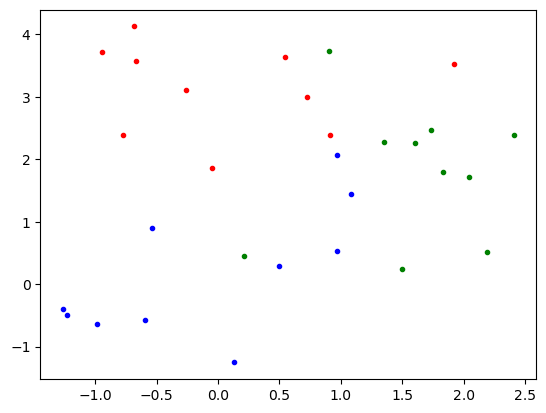

In [9]:
# Plot data
plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
plt.plot(inputs[labels == 2, 1], inputs[labels == 2, 2], "g.")
plt.show()


❓ Implement the multi-class perceptron algorithm by completing the `multi_class_perceptron_epoch` function. 

❓ Complete function `multi_class_classify` so that it provides the predicted labels given the inputs and the weights.

❓ Create or import a function that computes accuracy given the arrays of predicted and correct labels.

❓ Run 100 iterations of the algorithm, initializing all the weights to zero and using a learning rate of one. Save the accuracy of each epoch in a list. 

❓ What is the training accuracy (fraction of points that are correctly classified)?

❓ Plot the accuracies over epochs.

Note: Don't forget you have to augment the `inputs` with a dimension for the bias!

In [9]:
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        y_hat = np.argmax(np.dot(W, x))
        if y_hat != y:
            mistakes += 1
            W[y] += eta * x
            W[y_hat] -= eta * x

    print("Mistakes: %d" % mistakes)
    return W

In [10]:
def multi_class_classify(inputs, W):
    predicted_labels = np.argmax(np.dot(inputs, W.T), axis=1)
    return predicted_labels

In [11]:
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

(3, 3)
Mistakes: 13
Accuracy: 0.900000
Mistakes: 6
Accuracy: 0.666667
Mistakes: 7
Accuracy: 0.800000
Mistakes: 4
Accuracy: 0.800000
Mistakes: 6
Accuracy: 0.900000
Mistakes: 5
Accuracy: 0.900000
Mistakes: 4
Accuracy: 0.900000
Mistakes: 6
Accuracy: 0.866667
Mistakes: 6
Accuracy: 0.800000
Mistakes: 6
Accuracy: 0.933333
Mistakes: 5
Accuracy: 0.833333
Mistakes: 3
Accuracy: 0.866667
Mistakes: 6
Accuracy: 0.833333
Mistakes: 6
Accuracy: 0.933333
Mistakes: 3
Accuracy: 0.933333
Mistakes: 6
Accuracy: 0.833333
Mistakes: 5
Accuracy: 0.933333
Mistakes: 3
Accuracy: 0.933333
Mistakes: 4
Accuracy: 0.866667
Mistakes: 4
Accuracy: 0.966667
Mistakes: 3
Accuracy: 0.900000
Mistakes: 4
Accuracy: 0.933333
Mistakes: 4
Accuracy: 0.900000
Mistakes: 3
Accuracy: 0.900000
Mistakes: 3
Accuracy: 0.866667
Mistakes: 3
Accuracy: 0.866667
Mistakes: 6
Accuracy: 0.900000
Mistakes: 3
Accuracy: 0.833333
Mistakes: 6
Accuracy: 0.933333
Mistakes: 2
Accuracy: 0.933333
Mistakes: 2
Accuracy: 0.933333
Mistakes: 2
Accuracy: 0.933333


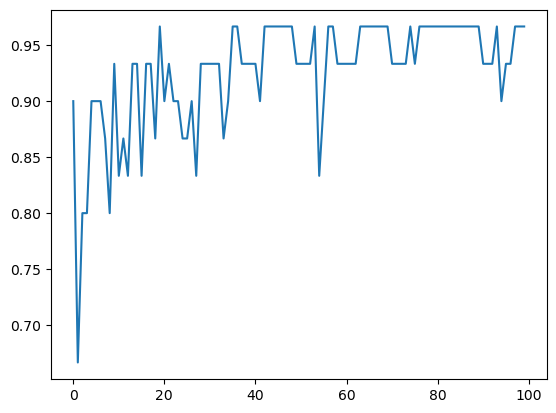

In [25]:
W = np.zeros((num_classes, num_features + 1))
eta = 1
accuracies = []

print(W.shape)

for i in range(100):  # 100 epochs
    W = multi_class_perceptron_epoch(inputs, labels, W, eta) # train
    y_pred = multi_class_classify(inputs, W) # predict
    acc = accuracy(y_pred, labels)
    accuracies.append(acc)
    print("Accuracy: %f" % acc)

plt.plot(accuracies)
plt.show()

## Question 3

Now it's time to try the perceptron on real data and see what happens.  

Let's load the UCI handwritten digits dataset using `scikit-learn`

In [14]:
from sklearn.datasets import load_digits

data = load_digits()

In [15]:
X = data['data']
y = data['target']

In [16]:
num_examples, num_features = np.shape(X)
num_labels = np.max(y) + 1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
X = np.concatenate([np.ones((num_examples, 1)), X], axis=1)

This is a dataset containing $1797$ 8x8 input images of digits, each corresponding to one out of 10 output classes. 
You can print the dataset description with `print(data.DESCR)
` and visualize some input examples:

<Figure size 640x480 with 0 Axes>

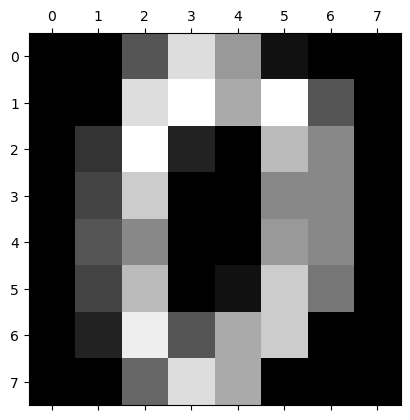

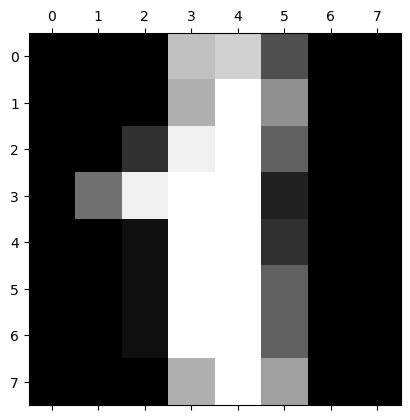

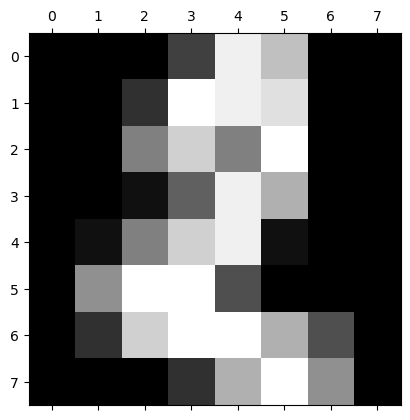

In [17]:
import matplotlib.pyplot as plt

plt.gray()
for i in range(3):
    plt.matshow(data.images[i])
plt.show()

We randomly split this data into training (80\%) and test (20\%) partitions. This can be done with:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

❓ Run your implementation of the multi-class perceptron algorithm on this dataset. Measure the training and test accuracy. 

In [ ]:
W = np.zeros((num_labels, num_features + 1))
eta = 1
accuracies = []

for i in range(200):
    W = multi_class_perceptron_epoch(X_train, y_train, W, eta)
    y_pred = multi_class_classify(X_train, W)
    acc = accuracy(y_pred, y_train)
    accuracies.append(acc)
    print("Accuracy: %f" % acc)

plt.plot(accuracies)
plt.show()

Mistakes: 329


Let's use `scikit-learn`'s implementation of the perceptron algorithm. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to understand what hyperparameters they are using and why the performances are different

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))